# HR Attrition Analysis & Churn Prediction

In [1]:
# Load Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Data
df = pd.read_csv("..\data\IBM_HR_Analytics.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [7]:
# Drop duplicates if any
# df.drop_duplicates(inplace=True)

In [8]:
# 🔍 Step 1: Data Checks
print("Shape:", df.shape)
print(df.info())

Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblev

In [9]:
print("\nDataset Description:")
#print(df.describe(include='all'))
print(df.describe())


Dataset Description:
               age    dailyrate  distancefromhome    education  employeecount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       employeenumber  environmentsatisfaction   hourlyrate  jobinvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [10]:
# Check missing values
print("\nMissing values by column:")
print(df.isnull().sum())


Missing values by column:
age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurren

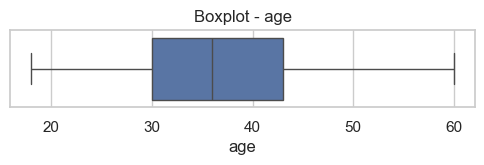

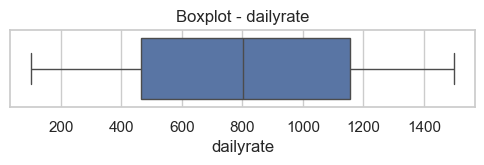

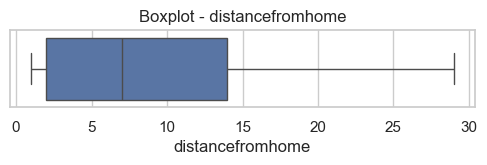

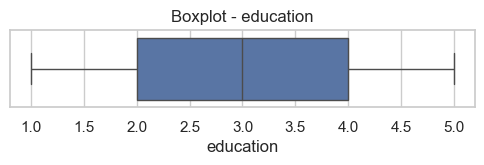

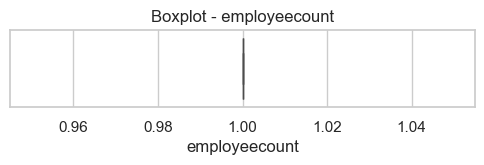

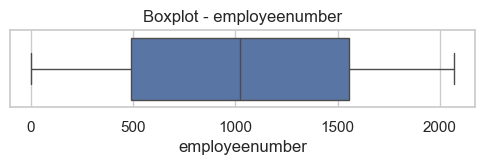

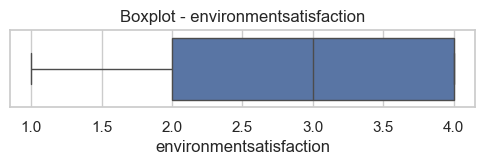

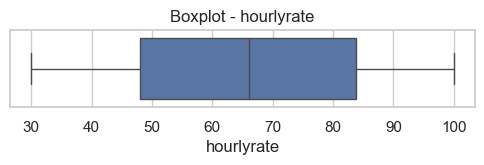

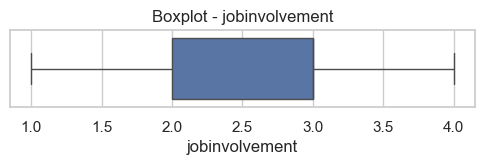

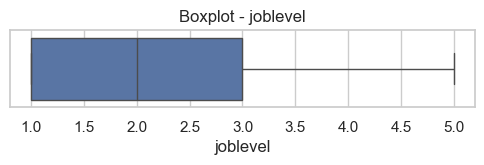

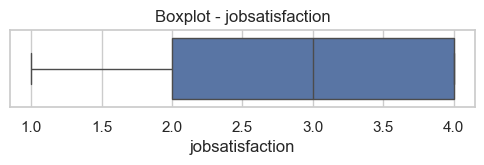

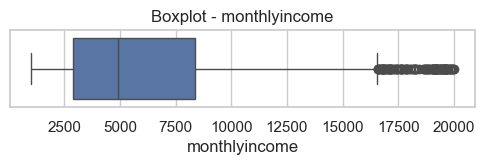

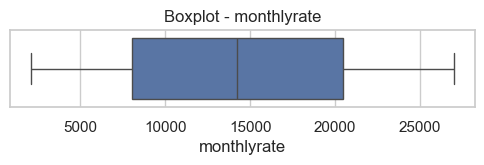

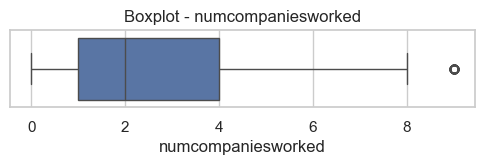

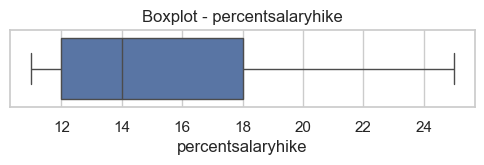

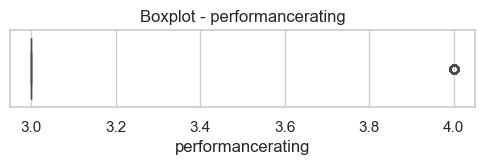

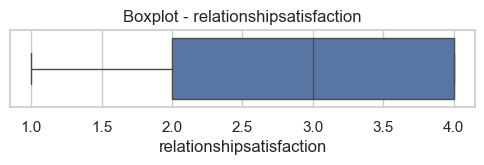

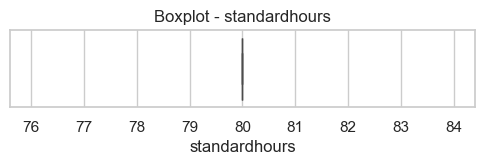

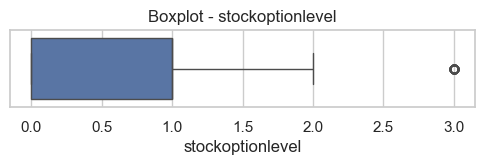

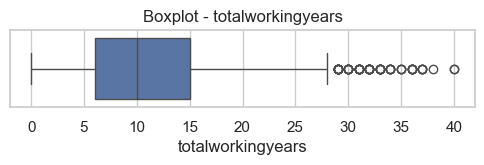

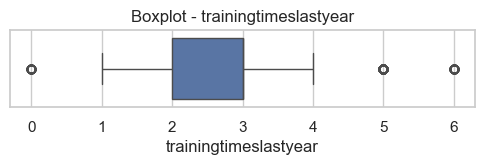

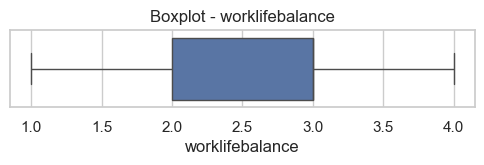

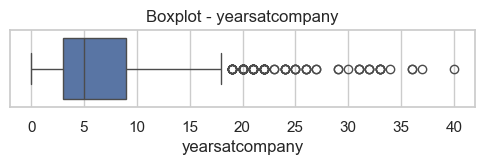

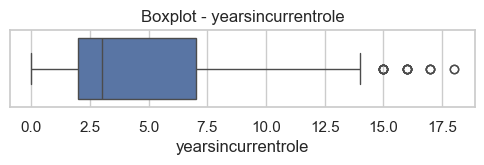

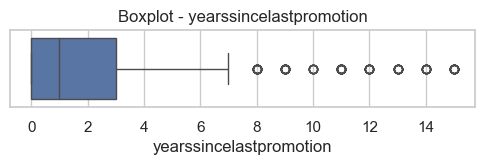

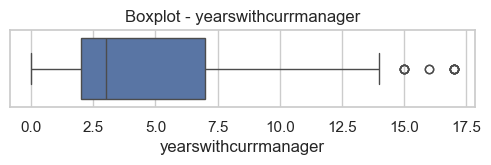

In [11]:
# Boxplots for outlier check
numerics = df.select_dtypes(include=['int64', 'float64'])
for col in numerics.columns:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


In [12]:
# 💡 Step 2: Data Cleaning
df.drop_duplicates(inplace=True)
df['numcompaniesworked'].fillna(df['numcompaniesworked'].median(), inplace=True)
df['totalworkingyears'].fillna(df['totalworkingyears'].median(), inplace=True)

# Drop constant columns
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)

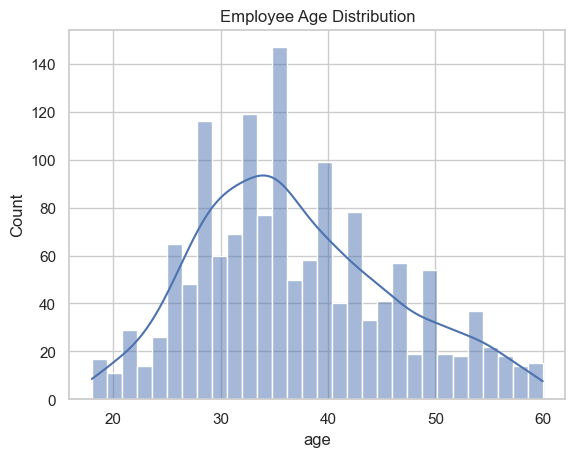

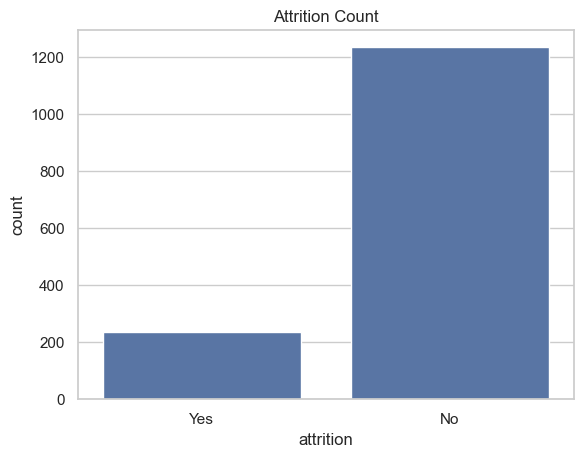

In [13]:
# 🧭 Step 3: Univariate Visuals
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Employee Age Distribution")
plt.show()

sns.countplot(data=df, x='attrition')
plt.title("Attrition Count")
plt.show()


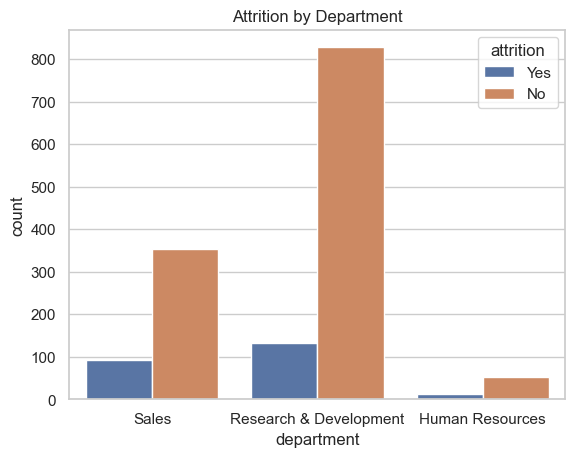

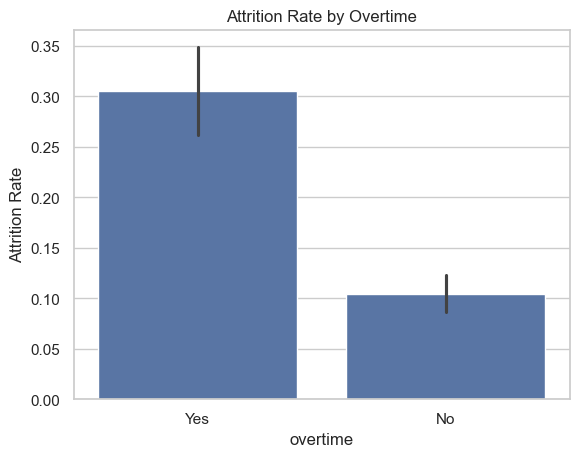

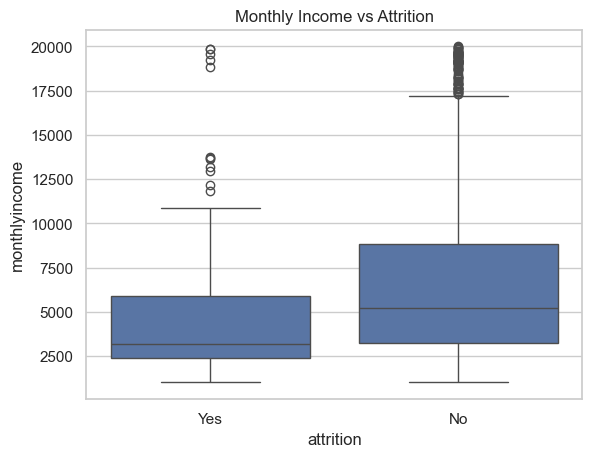

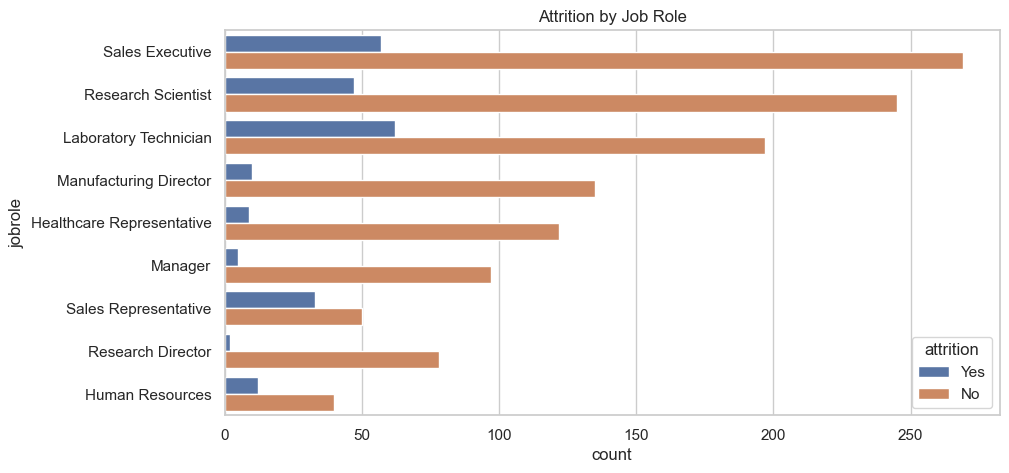

In [14]:
# 🔁 Step 4: Bivariate Visuals
sns.countplot(data=df, x='department', hue='attrition')
plt.title("Attrition by Department")
plt.show()

sns.barplot(data=df, x='overtime', y=df['attrition'].apply(lambda x: 1 if x=="Yes" else 0))
plt.title("Attrition Rate by Overtime")
plt.ylabel("Attrition Rate")
plt.show()

sns.boxplot(data=df, x='attrition', y='monthlyincome')
plt.title("Monthly Income vs Attrition")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='jobrole', hue='attrition')
plt.title("Attrition by Job Role")
plt.show()

In [15]:
# Attrition Rate Overall
attrition_rate = (df['attrition'] == 'Yes').mean() * 100
print(f"\nOverall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 16.12%


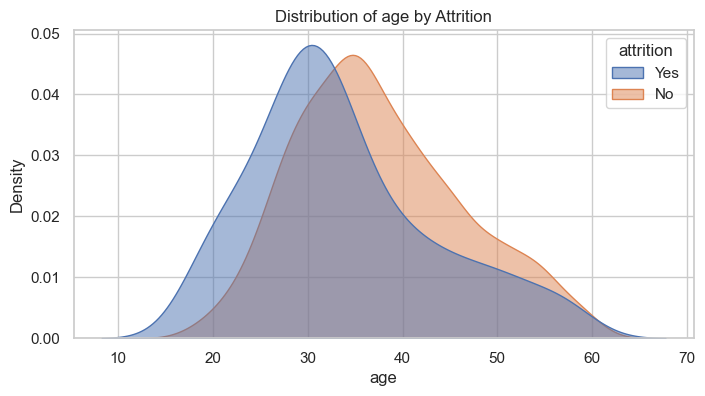

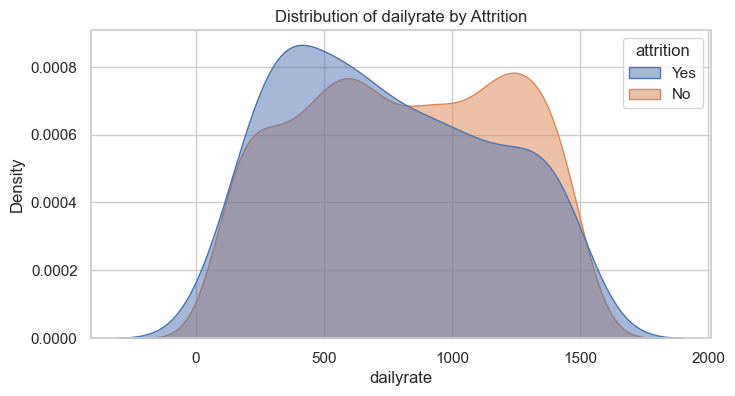

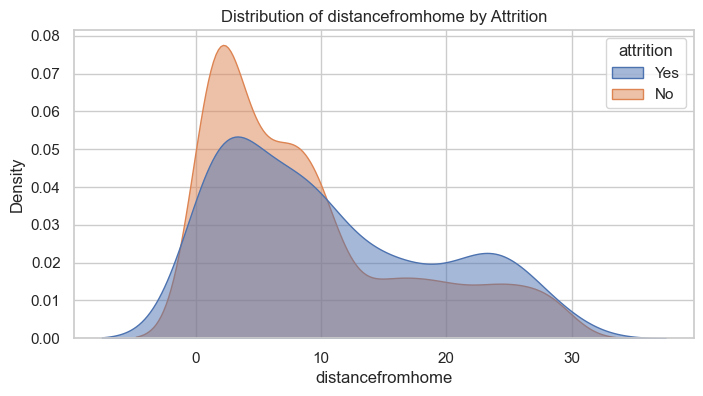

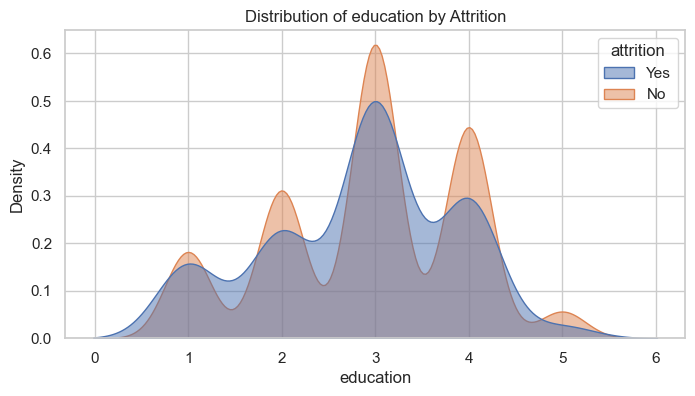

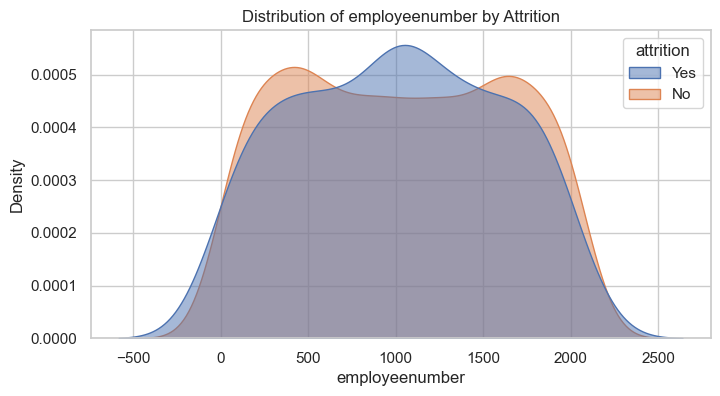

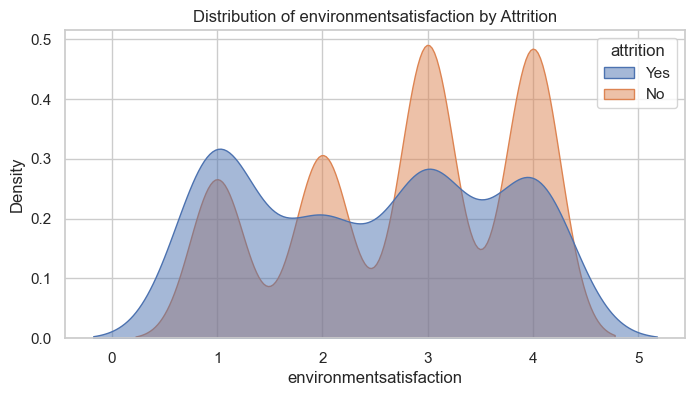

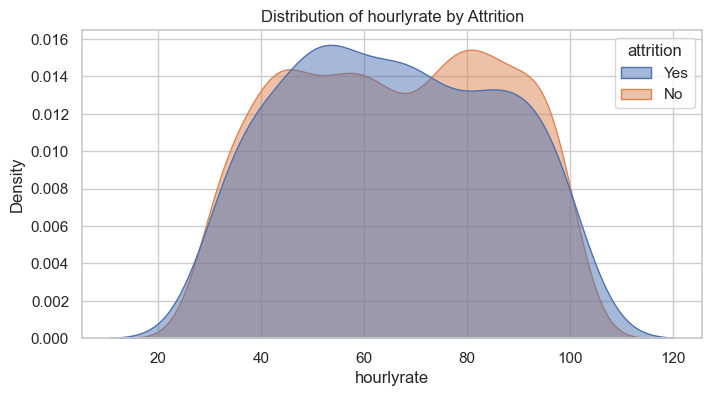

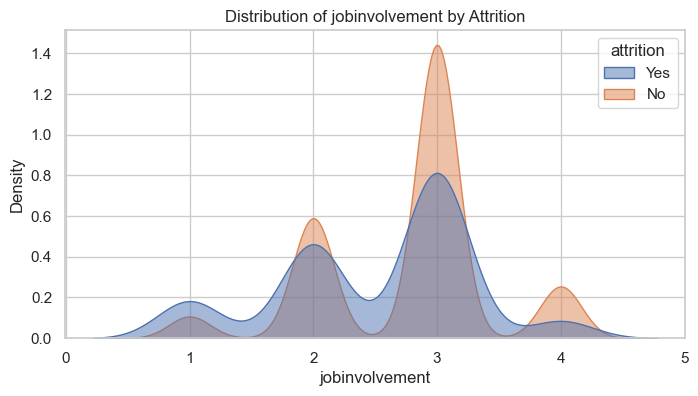

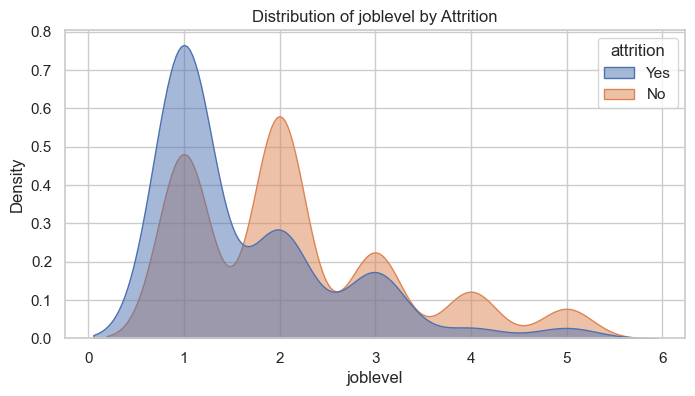

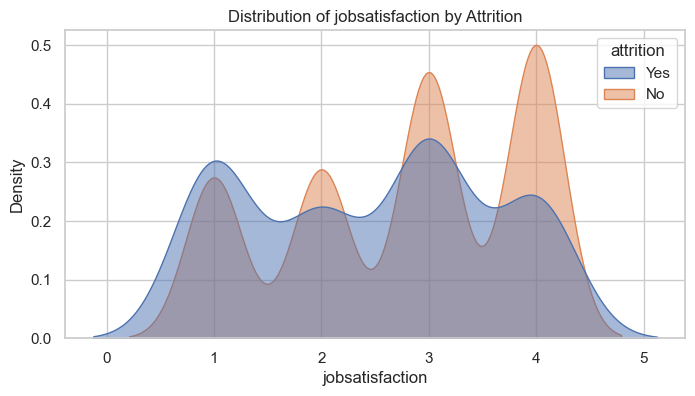

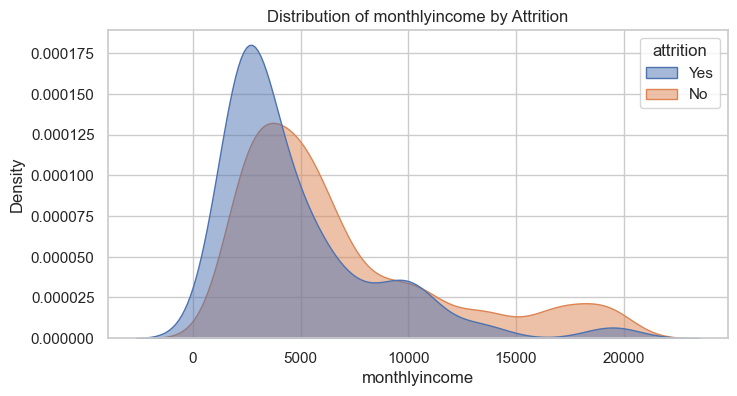

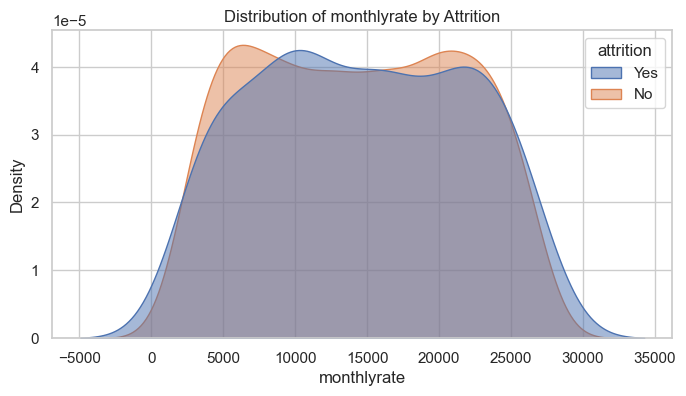

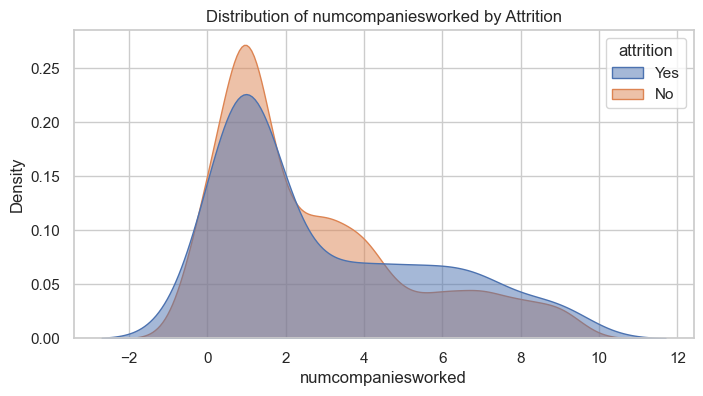

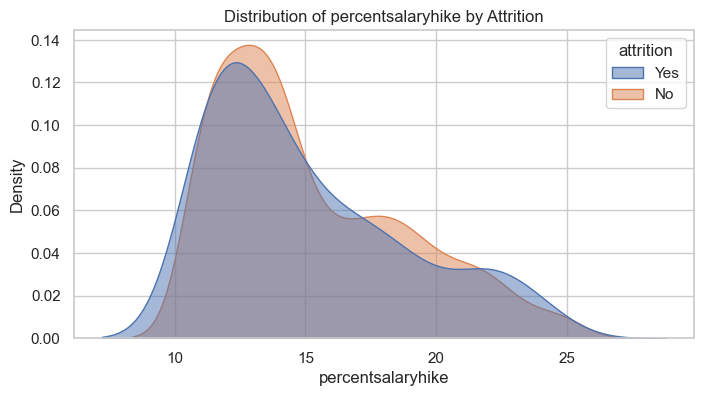

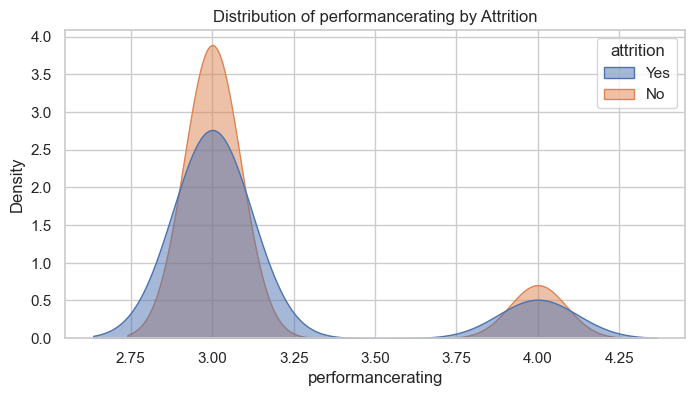

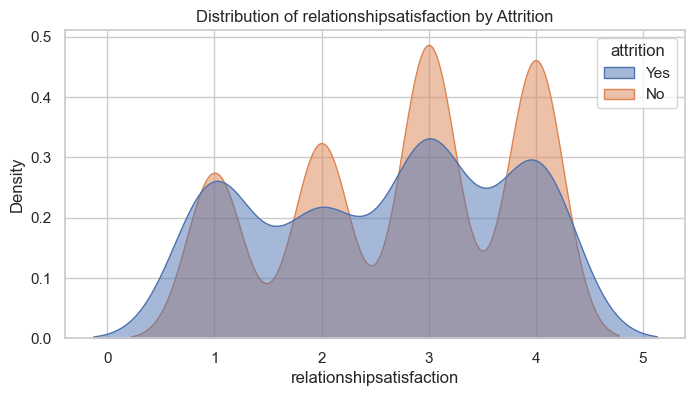

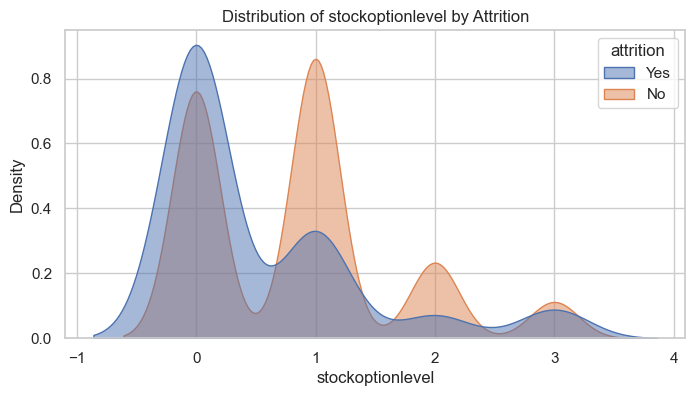

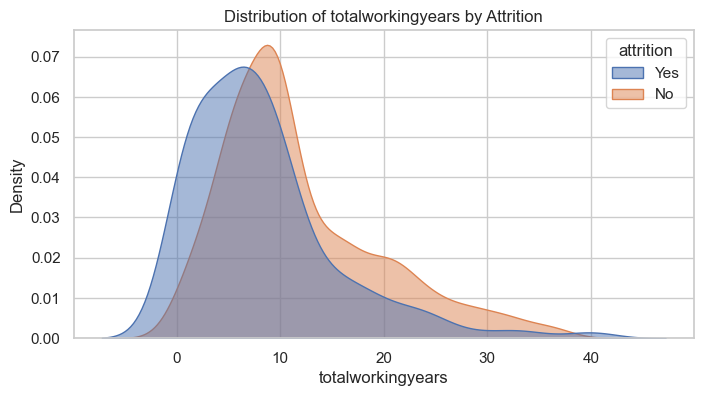

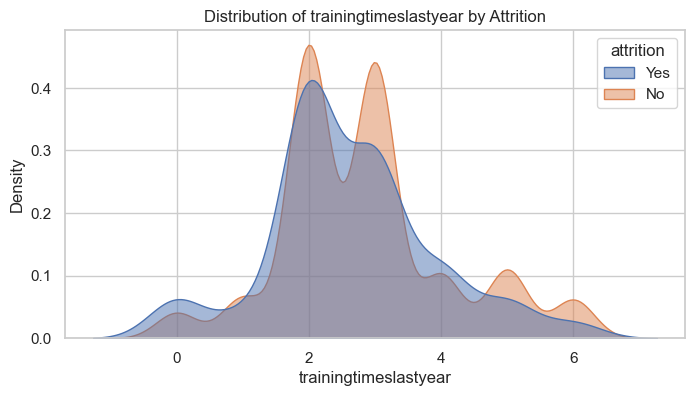

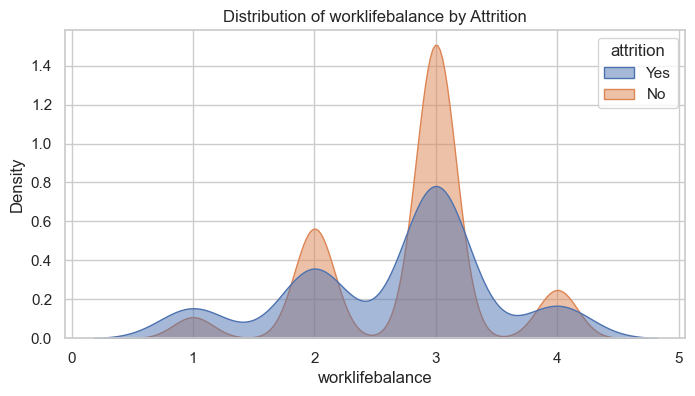

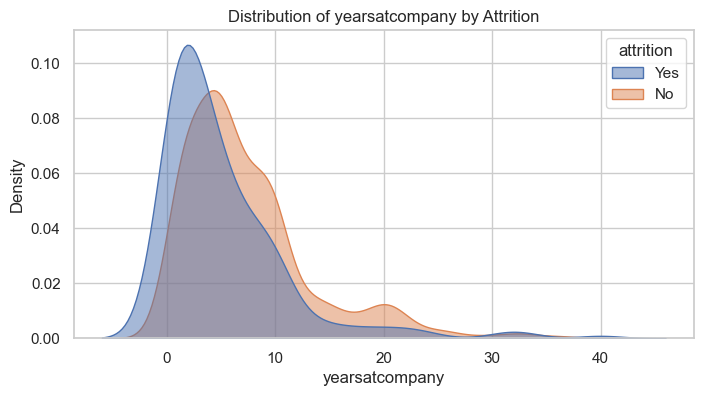

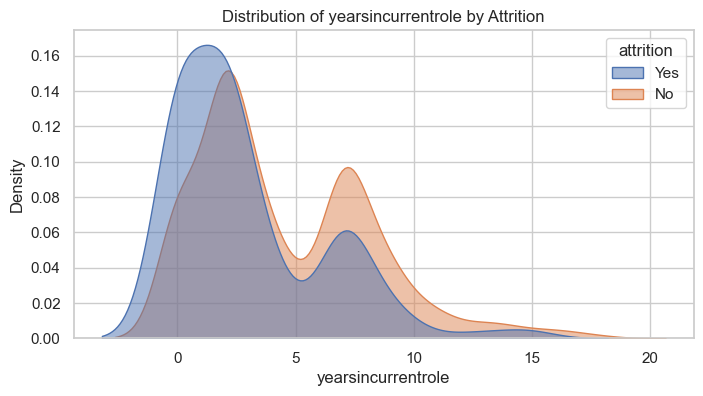

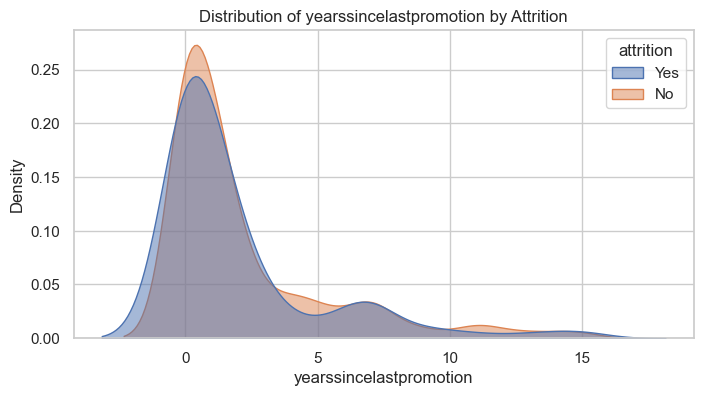

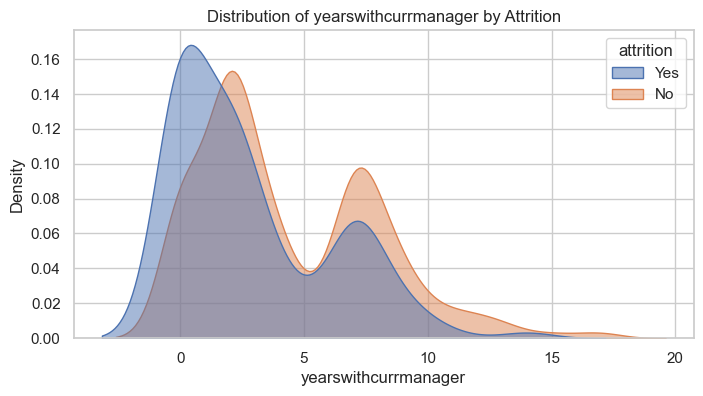


Attrition rate by businesstravel:
businesstravel
Travel_Frequently    24.909747
Travel_Rarely        14.956855
Non-Travel            8.000000
Name: attrition, dtype: float64


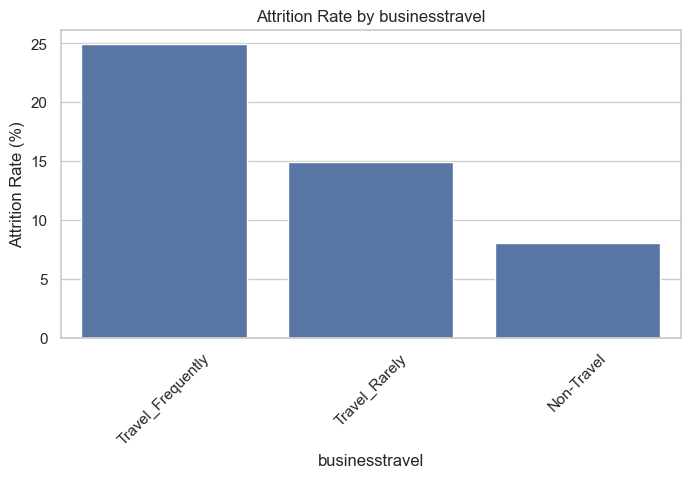


Attrition rate by department:
department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: attrition, dtype: float64


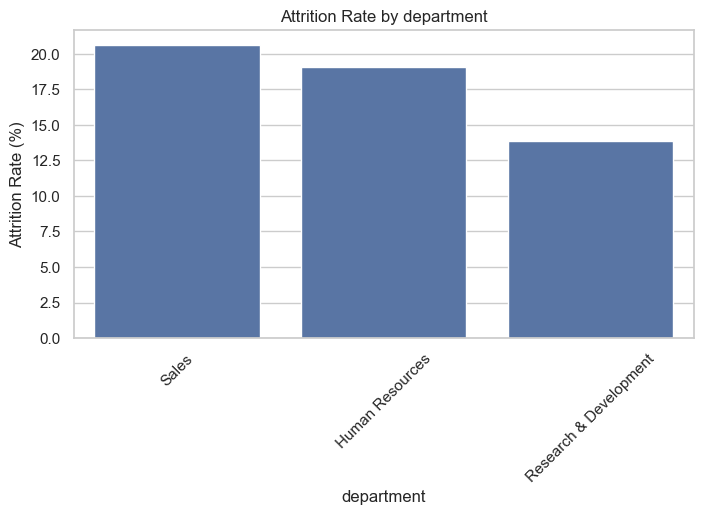


Attrition rate by educationfield:
educationfield
Human Resources     25.925926
Technical Degree    24.242424
Marketing           22.012579
Life Sciences       14.686469
Medical             13.577586
Other               13.414634
Name: attrition, dtype: float64


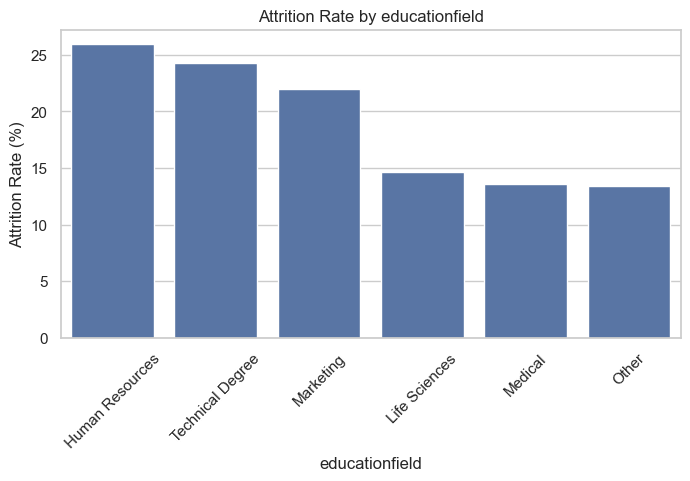


Attrition rate by gender:
gender
Male      17.006803
Female    14.795918
Name: attrition, dtype: float64


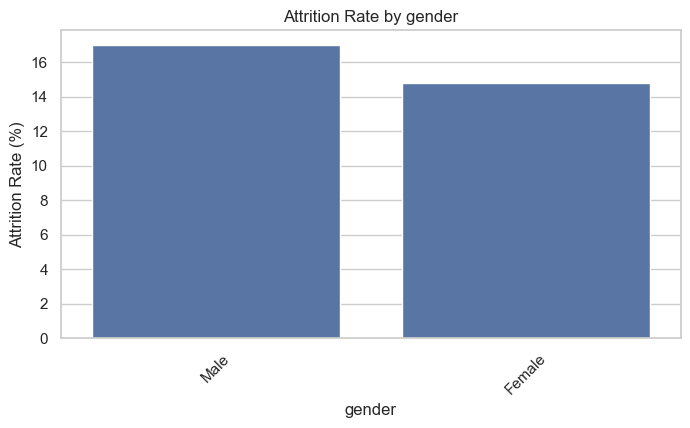


Attrition rate by jobrole:
jobrole
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
Name: attrition, dtype: float64


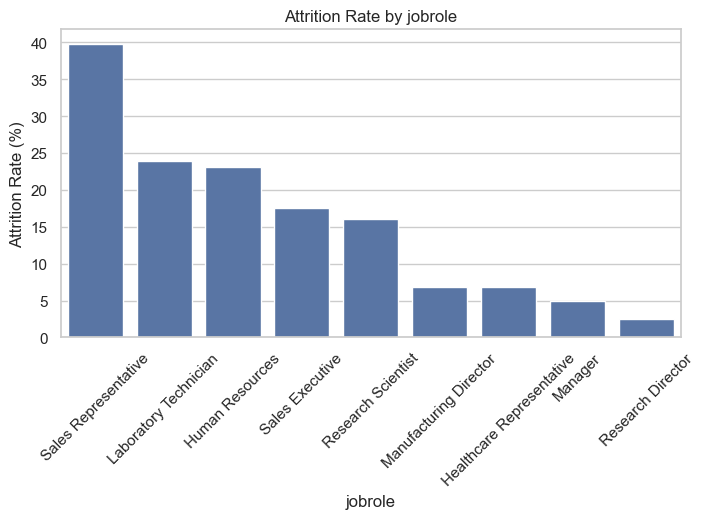


Attrition rate by maritalstatus:
maritalstatus
Single      25.531915
Married     12.481426
Divorced    10.091743
Name: attrition, dtype: float64


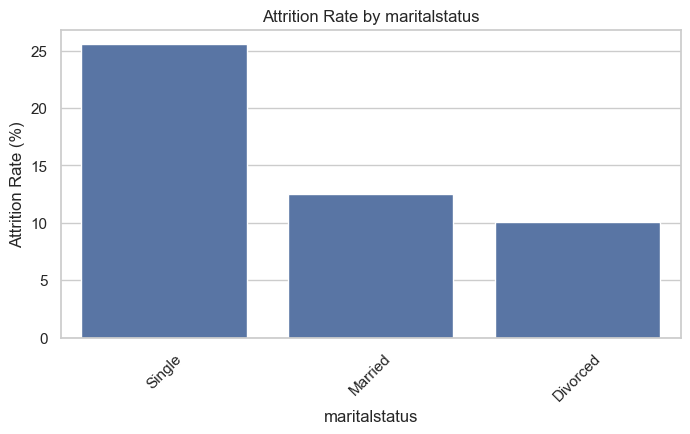


Attrition rate by overtime:
overtime
Yes    30.528846
No     10.436433
Name: attrition, dtype: float64


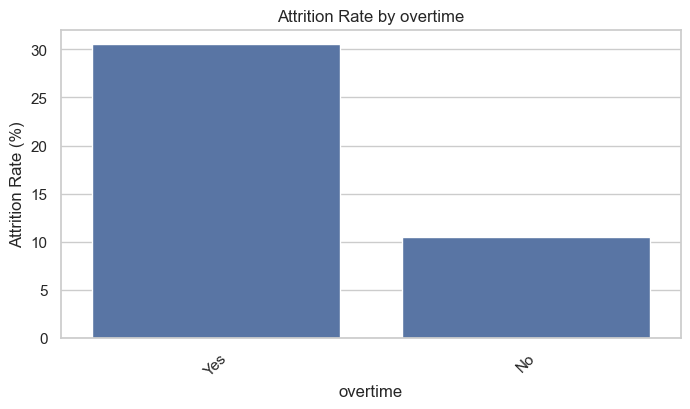

In [16]:
# Distribution of Numerical Features by Attrition
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('employeeid') if 'employeeid' in num_cols else None

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=col, hue='attrition', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

# Categorical Features Attrition Rate Table
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('attrition')

for col in cat_cols:
    print(f"\nAttrition rate by {col}:")
    rate = df.groupby(col)['attrition'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
    print(rate)

    plt.figure(figsize=(8,4))
    sns.barplot(x=rate.index, y=rate.values)
    plt.xticks(rotation=45)
    plt.ylabel('Attrition Rate (%)')
    plt.title(f'Attrition Rate by {col}')
    plt.show()

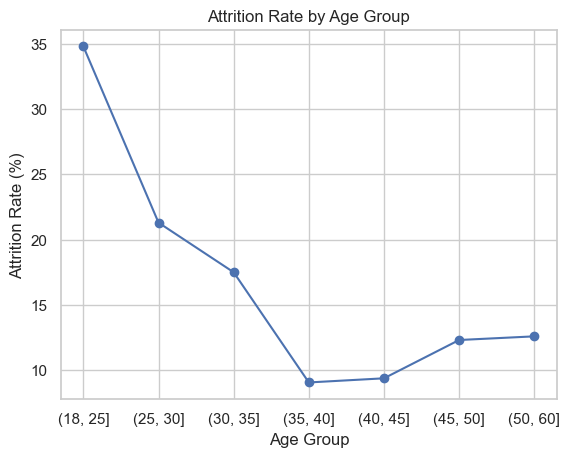

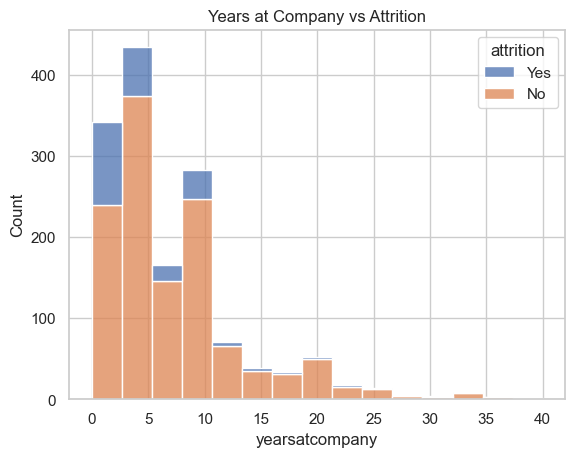

In [17]:
# 📈 Step 5: Trend Visuals
age_group = pd.cut(df['age'], bins=[18,25,30,35,40,45,50,60])
age_attrition = df.groupby(age_group)['attrition'].apply(lambda x: (x=="Yes").mean()*100)
age_attrition.plot(kind='line', marker='o')
plt.title("Attrition Rate by Age Group")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Age Group")
plt.show()

sns.histplot(data=df, x='yearsatcompany', hue='attrition', bins=15, multiple='stack')
plt.title("Years at Company vs Attrition")
plt.show()

In [18]:
# 📊 Step 6: KPIs
attrition_rate = df['attrition'].value_counts(normalize=True)['Yes'] * 100
avg_income = df['monthlyincome'].mean()
avg_tenure = df['yearsatcompany'].mean()

dept_attrition = df.groupby('department')['attrition'].apply(lambda x: (x=="Yes").mean()*100)
income_role = df.groupby('jobrole')['monthlyincome'].mean().sort_values(ascending=False)

print(f"\n🔸 Overall Attrition Rate: {attrition_rate:.2f}%")
print(f"🔸 Avg Monthly Income: ${avg_income:.0f}")
print(f"🔸 Avg Tenure (Years at Company): {avg_tenure:.2f}")
print("\n🔸 Attrition by Department:\n", dept_attrition)
print("\n🔸 Average Income by Job Role:\n", income_role)



🔸 Overall Attrition Rate: 16.12%
🔸 Avg Monthly Income: $6503
🔸 Avg Tenure (Years at Company): 7.01

🔸 Attrition by Department:
 department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: attrition, dtype: float64

🔸 Average Income by Job Role:
 jobrole
Manager                      17181.676471
Research Director            16033.550000
Healthcare Representative     7528.763359
Manufacturing Director        7295.137931
Sales Executive               6924.279141
Human Resources               4235.750000
Research Scientist            3239.972603
Laboratory Technician         3237.169884
Sales Representative          2626.000000
Name: monthlyincome, dtype: float64


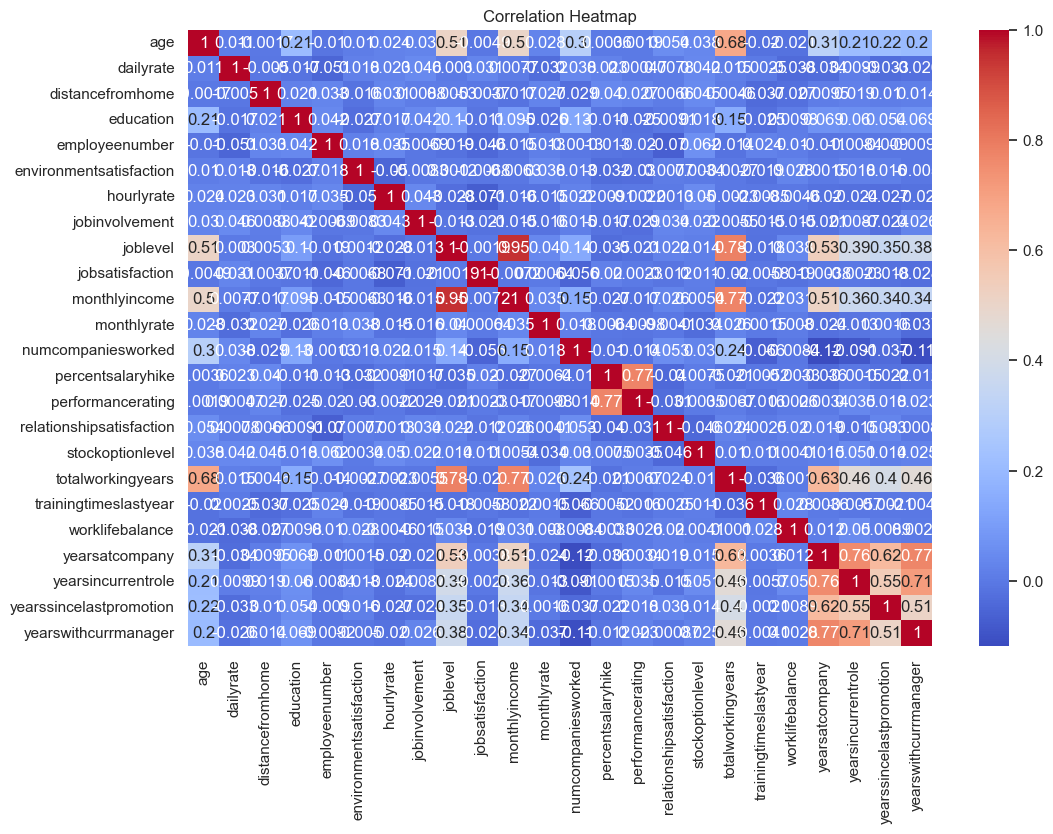

In [19]:
# 🔬 Step 7: Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Chi-square test for categorical variables against attrition
print("\nChi-square Test Results:")
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")


Chi-square Test Results:
businesstravel: p-value = 0.0000 (Significant)
department: p-value = 0.0045 (Significant)
educationfield: p-value = 0.0068 (Significant)
gender: p-value = 0.2906 (Not Significant)
jobrole: p-value = 0.0000 (Significant)
maritalstatus: p-value = 0.0000 (Significant)
overtime: p-value = 0.0000 (Significant)


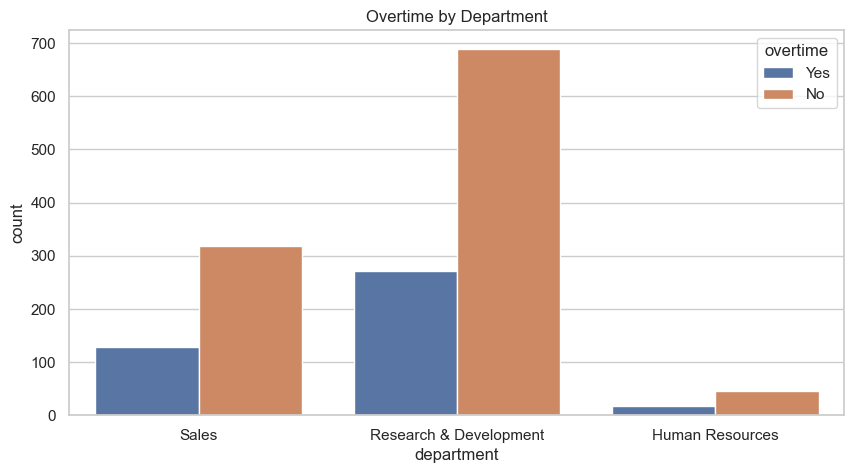

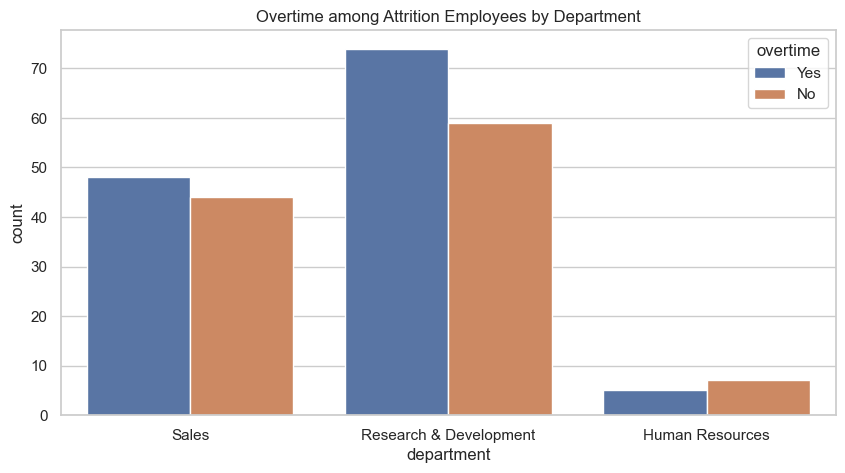

In [21]:
# Relationship between overtime and attrition by department
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='department', hue='overtime')
plt.title("Overtime by Department")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df[df['attrition']=='Yes'], x='department', hue='overtime')
plt.title("Overtime among Attrition Employees by Department")
plt.show()

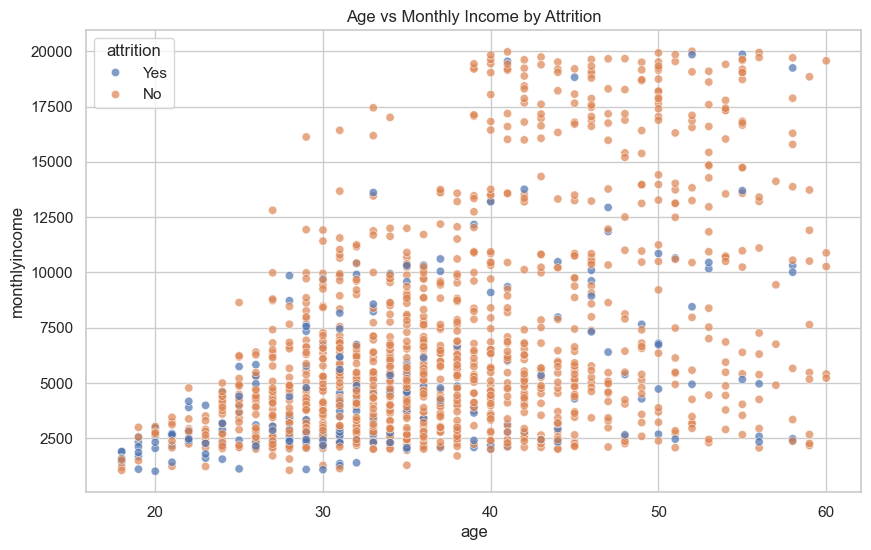

In [22]:
# Age vs Monthly Income colored by Attrition
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='monthlyincome', hue='attrition', alpha=0.7)
plt.title("Age vs Monthly Income by Attrition")
plt.show()


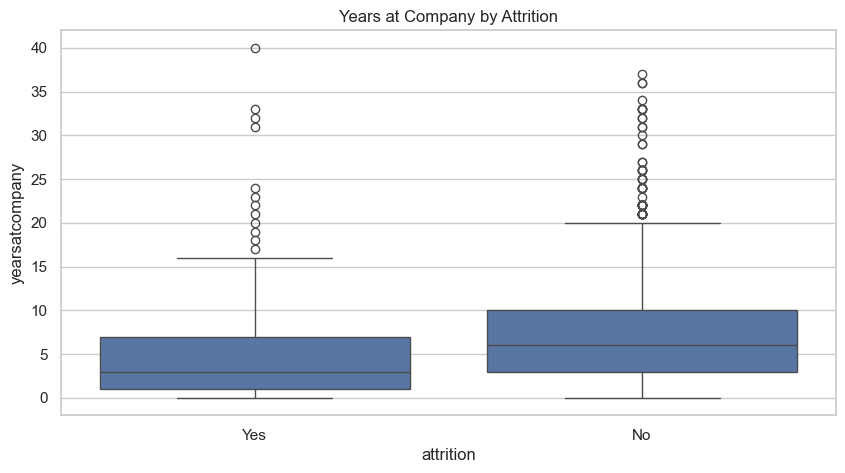

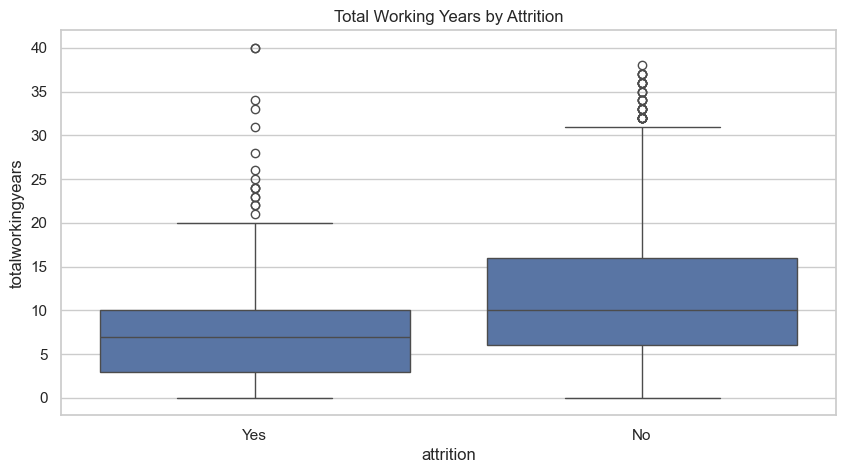

In [23]:
# Years at company and total working years distribution by attrition
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='attrition', y='yearsatcompany')
plt.title("Years at Company by Attrition")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='attrition', y='totalworkingyears')
plt.title("Total Working Years by Attrition")
plt.show()


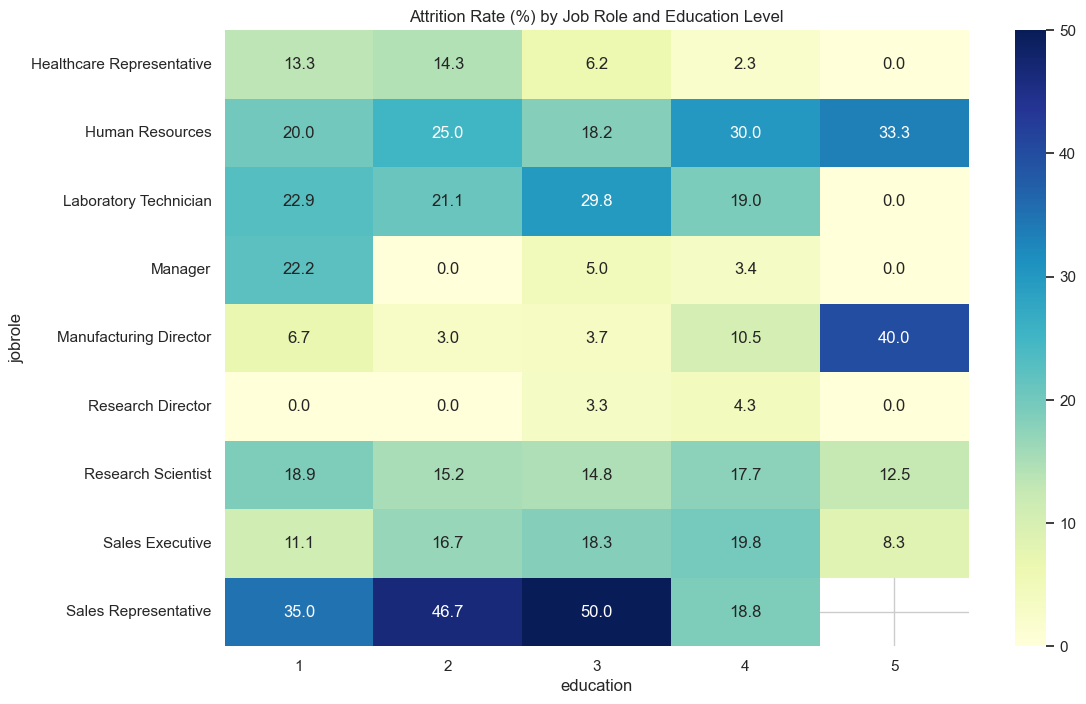

In [24]:
# Job Role and Education Level heatmap of Attrition Rate
pivot = df.pivot_table(index='jobrole', columns='education', values='attrition', aggfunc=lambda x: (x=='Yes').mean()*100)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Attrition Rate (%) by Job Role and Education Level")
plt.show()


In [25]:
import os

In [26]:
# Save EDA summary stats to CSV for reports
os.makedirs("data/eda_output", exist_ok=True)
df.describe(include='all').to_csv("../data/eda_summary_stats.csv")

print("\nEDA completed. Summary statistics saved to data/eda_output/eda_summary_stats.csv")


EDA completed. Summary statistics saved to data/eda_output/eda_summary_stats.csv


In [27]:
# 📤 Step 8: Save Cleaned Data
df.to_csv("../data/cleaned_hr_data.csv", index=False)
print("Cleaned data saved to cleaned_hr_data.csv")

Cleaned data saved to cleaned_hr_data.csv


# 🚀 Step 9: Machine Learning - Predict Attrition

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

In [29]:
# Encode categorical variables
df_model = df.copy()
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

In [30]:
# Split features and target
X = df_model.drop('attrition', axis=1)
y = df_model['attrition']

In [31]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [33]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [34]:
# Fit and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probas = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, probas)
    results.append((name, acc, roc))
    print(f"\n🔹 {name} Results:")
    print(classification_report(y_test, preds))
    print("ROC AUC:", roc)


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.54      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.71      0.61      0.63       441
weighted avg       0.84      0.87      0.84       441

ROC AUC: 0.7716566005176876

🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.57      0.13      0.21        61

    accuracy                           0.87       441
   macro avg       0.72      0.56      0.57       441
weighted avg       0.83      0.87      0.83       441

ROC AUC: 0.7561906816220879

🔹 SVM Results:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       380
           1       0.88      0.11      0.20        61

    accuracy                           0.88       44

In [35]:
# Summary table
print("\n📊 Model Comparison Summary:")
print(pd.DataFrame(results, columns=['Model', 'Accuracy', 'ROC_AUC']).sort_values(by='ROC_AUC', ascending=False))


📊 Model Comparison Summary:
                 Model  Accuracy   ROC_AUC
2                  SVM  0.875283  0.815552
3              XGBoost  0.879819  0.786713
0  Logistic Regression  0.866213  0.771657
1        Random Forest  0.866213  0.756191


In [36]:
# 🔧 Step 10: Hyperparameter Tuning (Random Forest Example)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
gs.fit(X_train, y_train)
print("\n🔍 Best Random Forest Params:", gs.best_params_)
print("ROC AUC on Test Set:", roc_auc_score(y_test, gs.predict_proba(X_test)[:,1]))


🔍 Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
ROC AUC on Test Set: 0.7664797238999137


In [37]:
# ✅ Step 11: Save Best Model
joblib.dump(gs.best_estimator_, '../models/best_random_forest.pkl')
print("Best model saved to models/best_random_forest.pkl")


Best model saved to models/best_random_forest.pkl


In [38]:
# 🧪 Step 12: Load and Test Model on New Data
loaded_model = joblib.load('../models/best_random_forest.pkl')
test_preds = loaded_model.predict(X_test)
test_probas = loaded_model.predict_proba(X_test)[:,1]

print("\n📦 Loaded Model Performance on Test Set:")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))
print("Test ROC AUC:", roc_auc_score(y_test, test_probas))


📦 Loaded Model Performance on Test Set:
[[376   4]
 [ 55   6]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441

Test ROC AUC: 0.7664797238999137


In [39]:
# 🔄 Step 13: K-Fold Cross-Validation on Best Model
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_roc_auc = cross_val_score(gs.best_estimator_, X_scaled, y, cv=kf, scoring='roc_auc')
print(f"\n📈 5-Fold CV ROC AUC scores: {cv_roc_auc}")
print(f"Mean ROC AUC: {cv_roc_auc.mean():.4f} | Std: {cv_roc_auc.std():.4f}")



📈 5-Fold CV ROC AUC scores: [0.80386179 0.79751016 0.84865191 0.80911362 0.77362391]
Mean ROC AUC: 0.8066 | Std: 0.0243



🔍 Attrition Class Distribution:
attrition
No     1233
Yes     237
Name: count, dtype: int64


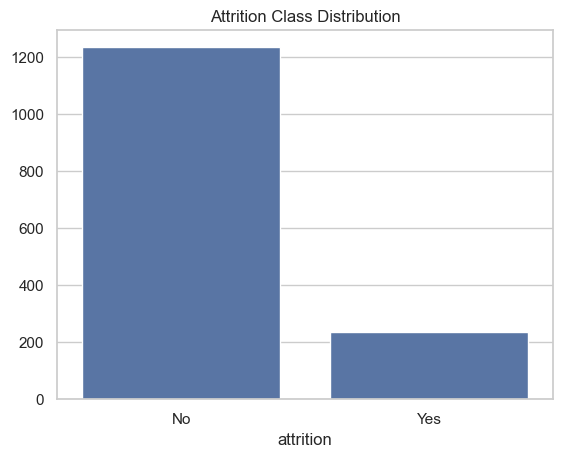

In [40]:
# 📊 Step 14: Check Data Imbalance
attrition_counts = df['attrition'].value_counts()
print(f"\n🔍 Attrition Class Distribution:\n{attrition_counts}")

sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title("Attrition Class Distribution")
plt.show()

In [41]:
# 📚 Step 15: Explain Overfitting and Underfitting
explanation = '''
Overfitting occurs when a model learns the training data too well, including noise and outliers, leading to poor generalization on new data.
Underfitting happens when a model is too simple to capture the underlying patterns of the data, resulting in poor performance on both training and test sets.
Balancing model complexity and using techniques like cross-validation, regularization, and pruning helps mitigate these issues.
'''
print(explanation)


Overfitting occurs when a model learns the training data too well, including noise and outliers, leading to poor generalization on new data.
Underfitting happens when a model is too simple to capture the underlying patterns of the data, resulting in poor performance on both training and test sets.
Balancing model complexity and using techniques like cross-validation, regularization, and pruning helps mitigate these issues.




📌 Classification Metrics Summary:
Accuracy: 0.8662
Precision: 0.6000
Recall: 0.0984
F1 Score: 0.1690
ROC AUC: 0.7665


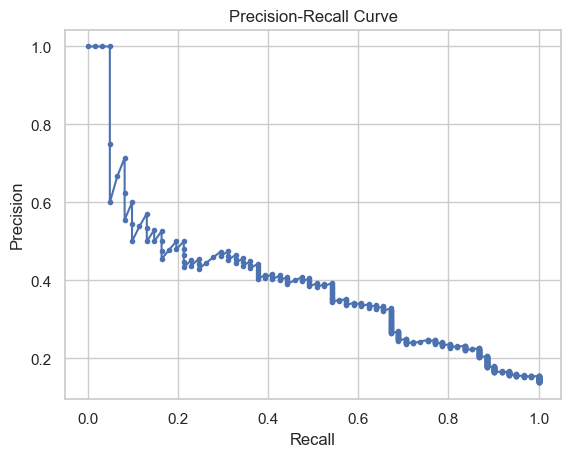

In [42]:
# 📋 Step 16: Detailed Classification Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, precision_recall_curve

precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
accuracy = accuracy_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_probas)

print(f"\n📌 Classification Metrics Summary:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, test_probas)
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [43]:
# Step 17: Classification metrics summary
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
accuracy = accuracy_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_probas)

In [44]:
print("\n📌 Classification Metrics Summary:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


📌 Classification Metrics Summary:
Accuracy: 0.8662
Precision: 0.6000
Recall: 0.0984
F1 Score: 0.1690
ROC AUC: 0.7665


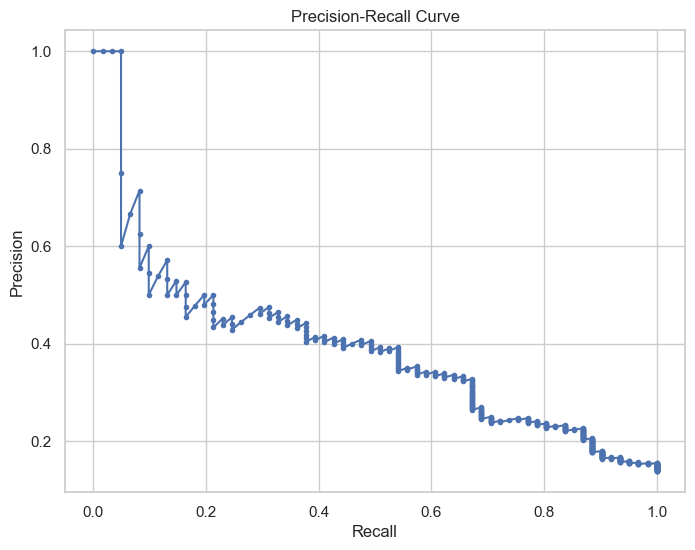

In [45]:
plt.figure(figsize=(8,6))
precision_vals, recall_vals, _ = precision_recall_curve(y_test, test_probas)
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [46]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [47]:
# Step 1: Feature Engineering
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df['tenure_bucket'] = pd.cut(df['yearsatcompany'], bins=[-1,1,3,6,10,40], labels=['<1 yr', '1-3 yrs', '4-6 yrs', '7-10 yrs', '10+ yrs'])
df['income_per_level'] = df['monthlyincome'] / df['joblevel']
df['overtime_flag'] = df['overtime'].map({'Yes':1, 'No':0})
df['is_senior'] = df['joblevel'].apply(lambda x: 1 if x >= 4 else 0)
df['years_left_ratio'] = df['yearswithcurrmanager'] / df['totalworkingyears']
df['years_left_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['years_left_ratio'].fillna(0, inplace=True)

In [48]:
# Step 2: Drop irrelevant columns
cols_to_drop = ['employeeid', 'standard_hours', 'dailyrate', 'hourlyrate', 'monthlyrate']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [49]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,...,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,age_group,tenure_bucket,income_per_level,overtime_flag,is_senior,years_left_ratio
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,6,4,0,5,36-45,4-6 yrs,2996.5,1,0,0.625000
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,10,7,1,7,46-55,7-10 yrs,2565.0,0,0,0.700000
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,0,0,0,36-45,<1 yr,2090.0,1,0,0.000000
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,8,7,3,0,26-35,7-10 yrs,2909.0,1,0,0.000000
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,2,2,2,2,26-35,1-3 yrs,3468.0,0,0,0.333333


In [50]:
# Step 3: Label Encode ALL object and category variables
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [51]:
# Step 4: Random Forest for Feature Importance
X = df_encoded.drop('attrition', axis=1)
y = df_encoded['attrition']

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

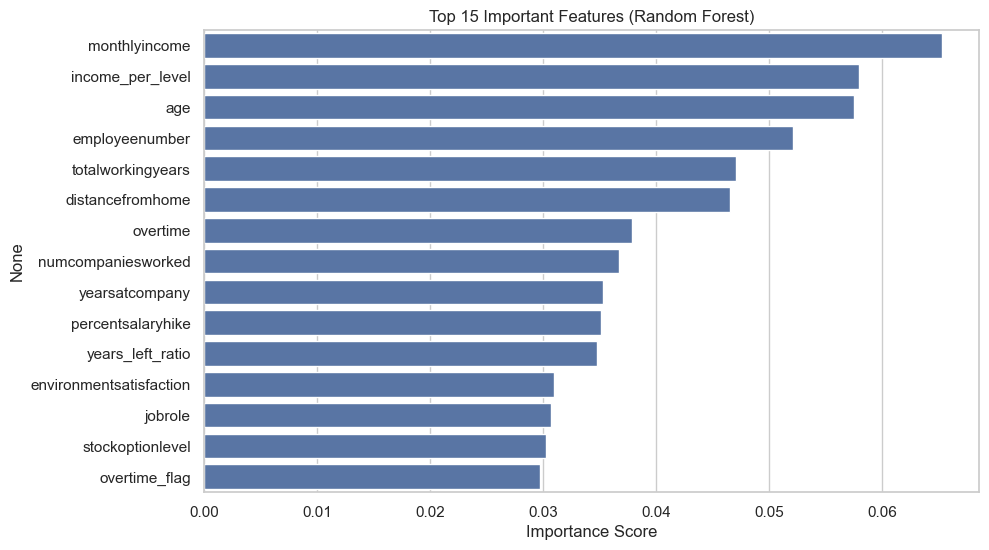

In [53]:
# # Step 5: Show Top 15 Features
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [54]:
# Final reduced dataset with top features
selected_cols = top_features.index.tolist() + ['attrition']
df_selected = df_encoded[selected_cols]

In [55]:
# Save it for modeling or dashboard
df_selected.to_csv("../data/cleaned/selected_features_hr_data.csv", index=False)
print("✅ Saved top features dataset to data/cleaned/selected_features_hr_data.csv")

✅ Saved top features dataset to data/cleaned/selected_features_hr_data.csv
